<a href="https://colab.research.google.com/github/Lindaagstna/latihan12ML/blob/main/latihan12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (8, 6)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SEMESTER3/praktikum_ml/praktikum12/data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
print("Nama Kelas: ['Malignant' (0), 'Benign' (1)]")
pd.Series(df['diagnosis']).value_counts()

Nama Kelas: ['Malignant' (0), 'Benign' (1)]


,count
diagnosis,
1,357
0,212


In [12]:
x = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

print('Shape of x:', x.shape)
print('Shape of y:', y.shape)

Shape of x: (569, 30)
Shape of y: (569,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape x_train:", x_train.shape)
print("Shape x_test:", x_test.shape)

Shape x_train: (455, 30)
Shape x_test: (114, 30)


In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled[:5]

array([[-1.07200079e+00, -6.58424598e-01, -1.08808010e+00,
        -9.39273639e-01, -1.35939882e-01, -1.00871795e+00,
        -9.68358632e-01, -1.10203235e+00,  2.81062120e-01,
        -1.13231479e-01, -7.04860874e-01, -4.40938351e-01,
        -7.43948977e-01, -6.29804931e-01,  7.48061001e-04,
        -9.91572979e-01, -6.93759567e-01, -9.83284458e-01,
        -5.91579010e-01, -4.28972052e-01, -1.03409427e+00,
        -6.23497432e-01, -1.07077336e+00, -8.76534437e-01,
        -1.69982346e-01, -1.03883630e+00, -1.07899452e+00,
        -1.35052668e+00, -3.52658049e-01, -5.41380026e-01],
       [ 1.74874285e+00,  6.65017334e-02,  1.75115682e+00,
         1.74555856e+00,  1.27446827e+00,  8.42288215e-01,
         1.51985232e+00,  1.99466430e+00, -2.93045055e-01,
        -3.20179716e-01,  1.27567198e-01, -3.81382677e-01,
         9.40746962e-02,  3.17524379e-01,  6.39656015e-01,
         8.73892616e-02,  7.08450758e-01,  1.18215034e+00,
         4.26212305e-01,  7.47970186e-02,  1.22834212e+

In [16]:
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(x_train_scaled, y_train)

y_pred_no_pca = svm_no_pca.predict(x_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi tanpa PCA:", acc_no_pca)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_no_pca, target_names=['Malignant', 'Benign']))

Akurasi tanpa PCA: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [18]:
pca = PCA(n_components=7)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

print("Shape x_train_pca:", x_train_pca.shape)
print("Shape x_test_pca:", x_test_pca.shape)

Shape x_train_pca: (455, 7)
Shape x_test_pca: (114, 7)


In [19]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Explained Variance yang dijelaskan 7 komponen pertama:", explained_variance.sum())

Explained Variance Ratio: [0.44413492 0.18944618 0.09543356 0.06724689 0.0551769  0.03934534
 0.02181766]
Total Explained Variance yang dijelaskan 7 komponen pertama: 0.9126014634880435


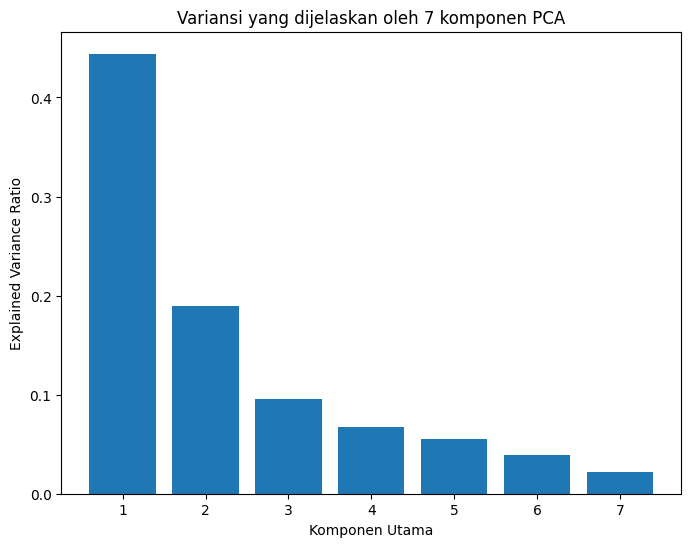

In [28]:
plt.bar([1, 2, 3, 4, 5, 6, 7], explained_variance)
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Variansi yang dijelaskan oleh 7 komponen PCA')
plt.show()

In [23]:
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(x_train_pca, y_train)

y_pred_pca = svm_pca.predict(x_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi dengan PCA 7 komponen:", acc_pca)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca, target_names=['Malignant', 'Benign']))

Akurasi dengan PCA 7 komponen: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.93      0.95      0.94        42
      Benign       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



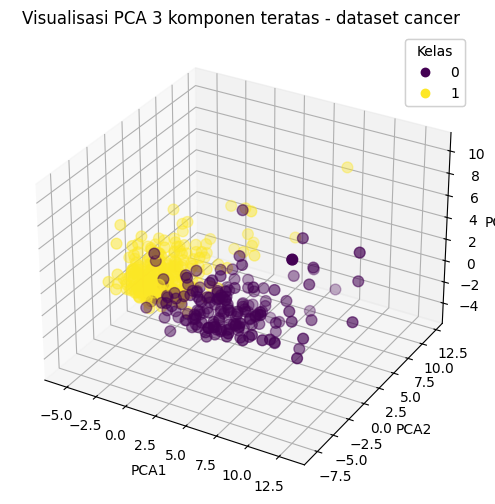

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    x_train_pca[:, 0],
    x_train_pca[:, 1],
    x_train_pca[:, 2],
    c=y_train,
    s=60
)
ax.set_title('Visualisasi PCA 3 komponen teratas - dataset cancer')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

legend1 = ax.legend(
    *scatter.legend_elements(),
    title="Kelas")
ax.add_artist(legend1)

plt.show()

In [24]:
comparison = pd.DataFrame({
    'Model': ['SVM tanpa PCA', 'SVM dengan PCA'],
    'Jumlah Fitur': [x_train_scaled.shape[1], x_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': [None, explained_variance.sum()]
})
comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM tanpa PCA,30,0.982456,NaN
1,SVM dengan PCA,7,0.956140,0.912601


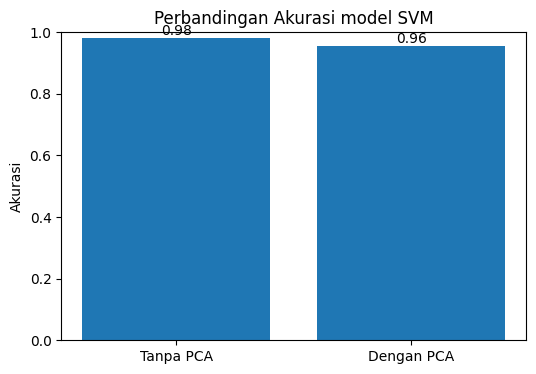

In [26]:
plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()